<a href="https://colab.research.google.com/github/kheireldine/Machine-learning-Projects/blob/main/cereals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cereals Raating
We have a dataset containing 5 columns are calories, protein, fat, soduim, fiber, and rating. 
We will train our model to predict the rating.


In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Data Loading


In [115]:
dataset = pd.read_csv("/content/cereals.csv")
dataset.head()

,calories,protein,fat,sodium,fiber,rating
0,70,4,1,130,10.0,68.402973
1,120,3,5,15,2.0,33.983679
2,70,4,1,260,9.0,59.425505
3,50,4,0,140,14.0,93.704912
4,110,2,2,180,1.5,29.509541


In [116]:
data = dataset.copy()
data.tail()

,calories,protein,fat,sodium,fiber,rating
2875,110,2,1,250,0.0,39.106174
2876,110,1,1,140,0.0,27.753301
2877,100,3,1,230,3.0,49.787445
2878,100,3,1,200,3.0,51.592193
2879,110,2,1,200,1.0,36.187559


In [117]:
data.isna().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
rating      0
dtype: int64

In [118]:
data = data.dropna()


We don't have Categorical data so no need for encoding

In [119]:
#Data Splitting 
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)
train_data.head()

,calories,protein,fat,sodium,fiber,rating
569,110,2,0,280,0.0,41.445019
1768,110,1,1,180,0.0,22.736446
2543,140,3,1,190,4.0,28.592785
2768,50,2,0,0,1.0,63.005645
1802,140,3,2,220,3.0,40.692320


**`Insepect The data `**

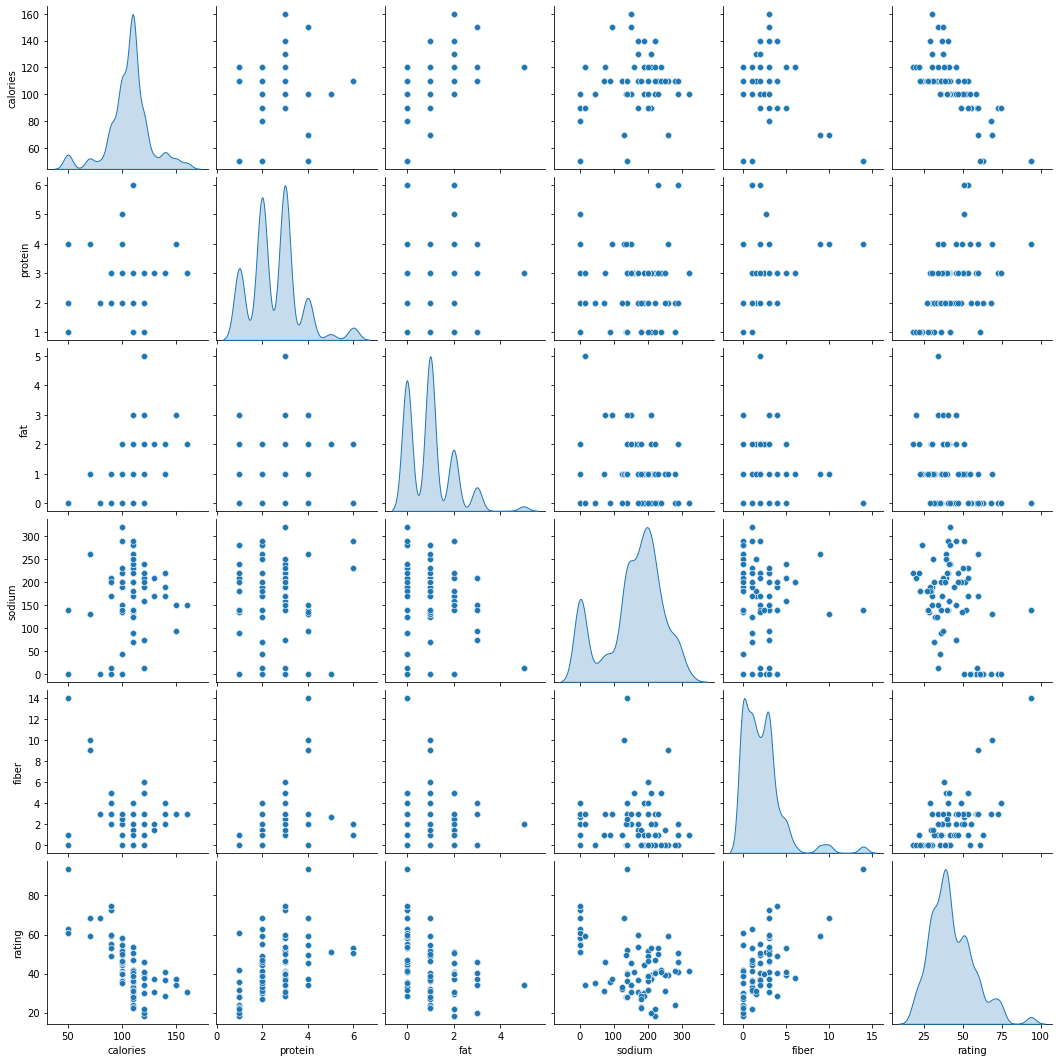

In [120]:
sns.pairplot(train_data, diag_kind='kde')

**Splitting Labels from Features **

In [121]:
train_features = train_data.copy()
test_features = test_data.copy()

train_labels = train_features.pop('rating')
test_labels = test_features.pop('rating')
train_labels.head(15)

569     41.445019
1768    22.736446
2543    28.592785
2768    63.005645
1802    40.692320
1942    32.207582
1129    46.895644
619     31.230054
2043    59.642837
692     74.472949
2854    31.230054
1139    23.804043
118     34.139765
2634    46.658844
104     23.804043
Name: rating, dtype: float64

In [122]:
#Normalization
train_data.describe().transpose()[['mean', 'std']]

,mean,std
calories,106.801215,19.377245
protein,2.544271,1.097007
fat,0.989149,0.978876
sodium,158.370226,84.620696
fiber,2.167839,2.328745
rating,42.835324,14.051752


In [123]:
normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(np.array(train_features))

# MODEL

In [124]:
rat = np.array(train_features)

rat_normalizer = layers.Normalization(input_shape=[1,], axis=None)
rat_normalizer.adapt(rat)

In [125]:
train_features.head()

,calories,protein,fat,sodium,fiber
569,110,2,0,280,0.0
1768,110,1,1,180,0.0
2543,140,3,1,190,4.0
2768,50,2,0,0,1.0
1802,140,3,2,220,3.0


In [126]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [127]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [128]:
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [129]:
linear_model.predict(train_features[:10])

array([[33.453735],
       [29.227322],
       [35.358116],
       [65.7927  ],
       [29.2818  ],
       [38.067192],
       [37.453747],
       [40.343136],
       [54.01561 ],
       [62.56751 ]], dtype=float32)

In [130]:
 linear_model.evaluate(
    test_features, test_labels, verbose=0)

4.618303298950195

# DNN

In [131]:
#data augmentation
data=data.append(data)
data


,calories,protein,fat,sodium,fiber,rating
0,70,4,1,130,10.0,68.402973
1,120,3,5,15,2.0,33.983679
2,70,4,1,260,9.0,59.425505
3,50,4,0,140,14.0,93.704912
4,110,2,2,180,1.5,29.509541
...,...,...,...,...,...,...
2875,110,2,1,250,0.0,39.106174
2876,110,1,1,140,0.0,27.753301
2877,100,3,1,230,3.0,49.787445
2878,100,3,1,200,3.0,51.592193


In [166]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      
      layers.Dense(1, activation='linear')
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.000000001))
  return model

In [167]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 5)                11        
 ion)                                                            
                                                                 
 dense_65 (Dense)            (None, 64)                384       
                                                                 
 dense_66 (Dense)            (None, 64)                4160      
                                                                 
 dense_67 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,620
Trainable params: 4,609
Non-trainable params: 11
_________________________________________________________________


In [168]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=500)

CPU times: user 13.4 s, sys: 994 ms, total: 14.4 s
Wall time: 20.9 s


In [169]:
dnn_model.evaluate(test_features, test_labels, verbose=0)

42.88325119018555